In [1]:
import pandas as pd

df=pd.read_csv('d:/data/steam/steam_final.csv')
df.head()

,days_after_releasing,english,required_age,achievements,average_playtime,median_playtime,owners,price,positive_ratings,negative_ratings,...,Action,Casual,Adventure,Strategy,Simulation,Early Access,RPG,Free to Play,Puzzle,p-n ratio
0,6769,1,0,0,17612,317,15000000,7.19,124534,3339,...,1,0,0,0,0,0,0,0,0,37.296795
1,7349,1,0,0,277,62,7500000,3.99,3318,633,...,1,0,0,0,0,0,0,0,0,5.241706
2,5858,1,0,0,187,34,7500000,3.99,3416,398,...,0,0,0,0,0,0,0,0,0,8.582915
3,6557,1,0,0,258,184,7500000,3.99,1273,267,...,1,0,0,0,0,0,0,0,0,4.767790
4,7135,1,0,0,624,415,7500000,3.99,5250,288,...,1,0,0,0,0,0,0,0,0,18.229167


In [2]:
import numpy as np
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font', family=font_name)

df['p-n ratio_categorize']=np.digitize(df['p-n ratio'], [0,5])
df.head()

,days_after_releasing,english,required_age,achievements,average_playtime,median_playtime,owners,price,positive_ratings,negative_ratings,...,Casual,Adventure,Strategy,Simulation,Early Access,RPG,Free to Play,Puzzle,p-n ratio,p-n ratio_categorize
0,6769,1,0,0,17612,317,15000000,7.19,124534,3339,...,0,0,0,0,0,0,0,0,37.296795,2
1,7349,1,0,0,277,62,7500000,3.99,3318,633,...,0,0,0,0,0,0,0,0,5.241706,2
2,5858,1,0,0,187,34,7500000,3.99,3416,398,...,0,0,0,0,0,0,0,0,8.582915,2
3,6557,1,0,0,258,184,7500000,3.99,1273,267,...,0,0,0,0,0,0,0,0,4.767790,1
4,7135,1,0,0,624,415,7500000,3.99,5250,288,...,0,0,0,0,0,0,0,0,18.229167,2


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (1: 나쁨, 2: 좋음)')

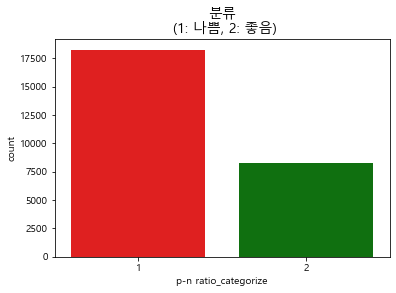

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

colors=['red','green']
sns.countplot('p-n ratio_categorize', data=df, palette=colors)
plt.title("분류\n (1: 나쁨, 2: 좋음)", fontsize=14)

In [4]:
from imblearn.under_sampling import RandomUnderSampler

X=df[df.columns[:-2]]
y=df['p-n ratio_categorize']

X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample, columns=df.columns[:-2])
y_samp=pd.DataFrame(data=y_sample, columns=['p-n ratio_categorize'])
df2=pd.concat([X_samp,y_samp], axis=1)

In [5]:
df2['p-n ratio_categorize'].value_counts()

1    8284
2    8284
Name: p-n ratio_categorize, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (1: 나쁨, 2: 좋음)')

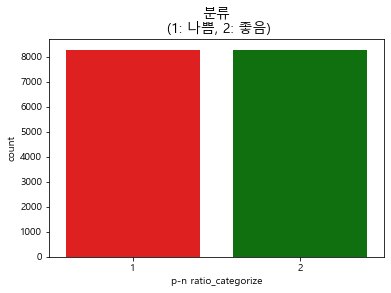

In [6]:
sns.countplot('p-n ratio_categorize', data=df2, palette=colors)
plt.title("분류\n (1: 나쁨, 2: 좋음)", fontsize=14)

In [7]:
X=df2[df2.columns[:-1]]
y=df2['p-n ratio_categorize']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

model=MLPClassifier(random_state=42)
model.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [9]:
print("학습용 :", model.score(X_train, y_train))
print("검증용 :", model.score(X_test, y_test))

학습용 : 0.8241285649615211
검증용 : 0.8252866626433313


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
model=MLPClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [12]:
print("학습용 :", model.score(X_train_scaled, y_train))
print("검증용 :", model.score(X_test_scaled, y_test))

학습용 : 0.8598159046325637
검증용 : 0.7462281231140615


In [13]:
from sklearn.metrics import confusion_matrix

pred=model.predict(X_test_scaled)
cm=confusion_matrix(y_test, pred)
cm

array([[1325,  304],
       [ 537, 1148]], dtype=int64)

<AxesSubplot:title={'center':'Confusion Matrix'}>

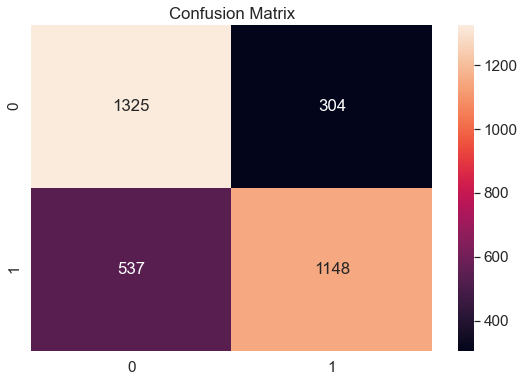

In [14]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='d')